# Negation scope - with bag of words

## Definition of all the imports and constants

In [1]:
# Define all the imports and constants
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from utils.dataset import preprocess_dataset, get_datasets, load_dataset, dataset_name
from utils.scope import create_semi_dataset, create_columns_names, create_features_list, show_metrics_on_all_datasets
from utils.common import print_score, show_roc_curve, save_model, create_vectorizer

FUNCTIONS = {
        'create_semi_dataset': create_semi_dataset,
        'create_vectorizer': create_vectorizer,
        'create_columns_names': create_columns_names,
        'create_features_list': create_features_list,
}

SUFFIX = 'sco-bow'

## Creation of datasets & preprocessing

In [6]:
# Preprocess SNK dataset
vect_lemma = preprocess_dataset('dataset/snk/merged.xml', SUFFIX, True, FUNCTIONS)

utils.dataset - INFO - ***** Create dataset snk *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


In [7]:
%%time
# Preprocess all datasets - it takes a long time

for dataset in get_datasets(with_all=False):
    preprocess_dataset(dataset, SUFFIX, True, FUNCTIONS, vect_lemma)

utils.dataset - INFO - ***** Create dataset beletria *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset recenzie *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset snk *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset sport *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset vlastne_mario *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


CPU times: user 7min 21s, sys: 53.7 s, total: 8min 14s
Wall time: 9min 12s


## Training

In [8]:
%%time

# Load preprocessed dataset
DATASET = 'dataset/snk/merged.csv'
X_train, X_test, Y_train, Y_test = load_dataset(DATASET, SUFFIX, ['token', 'lemma', 'POS', 'is_in_scope'])

CPU times: user 31.3 s, sys: 3.41 s, total: 34.7 s
Wall time: 37 s


In [15]:
%%time

ALGORITHM = 'RandomForest'

# Train a model using the training sets 
# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion='entropy')

model.fit(X_train, Y_train.is_in_scope)

CPU times: user 49.6 s, sys: 1.99 s, total: 51.6 s
Wall time: 53.5 s


## Metrics

Accuracy: 0.9111969111969112
Precision: 0.937984496124031
Recall: 0.35276967930029157
F1 score: 0.5127118644067797
Classification report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2247
          1       0.94      0.35      0.51       343

avg / total       0.91      0.91      0.89      2590



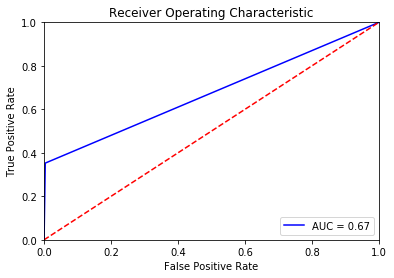

In [10]:
y_predicted = model.predict(X_test)
y_true = Y_test.is_in_scope

# Print basic metrics
print_score(y_predicted, y_true)

# Show ROC curve
show_roc_curve(y_predicted, y_true, save_name='{}-{}-{}-main.svg'.format(SUFFIX, dataset_name(DATASET), ALGORITHM))

## Metric on all datasets

beletria


Accuracy: 0.8913072867378667
Precision: 0.926530612244898
Recall: 0.2240868706811451
F1 score: 0.36089030206677264
Classification report:
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      6384
          1       0.93      0.22      0.36      1013

avg / total       0.90      0.89      0.86      7397



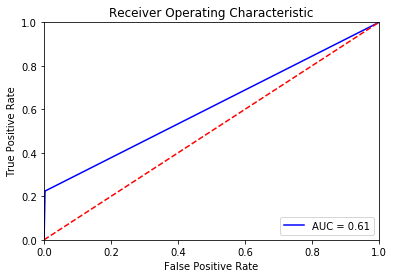

recenzie


Accuracy: 0.895760336370007
Precision: 0.8459016393442623
Recall: 0.3200992555831266
F1 score: 0.46444644464446444
Classification report:
             precision    recall  f1-score   support

          0       0.90      0.99      0.94      4902
          1       0.85      0.32      0.46       806

avg / total       0.89      0.90      0.87      5708



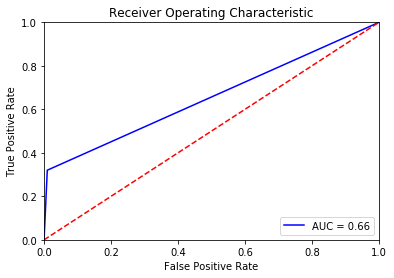

snk


Accuracy: 0.9778099372889532
Precision: 0.9927404718693285
Recall: 0.831306990881459
F1 score: 0.9048800661703887
Classification report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      9049
          1       0.99      0.83      0.90      1316

avg / total       0.98      0.98      0.98     10365



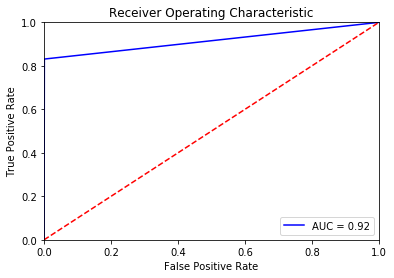

sport


Accuracy: 0.8520364741641338
Precision: 0.9610894941634242
Recall: 0.29213483146067415
F1 score: 0.4480725623582767
Classification report:
             precision    recall  f1-score   support

          0       0.84      1.00      0.91      6534
          1       0.96      0.29      0.45      1691

avg / total       0.87      0.85      0.82      8225



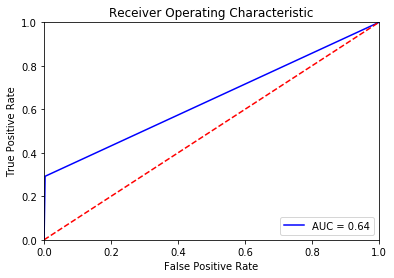

vlastne_mario


Accuracy: 0.8746770025839793
Precision: 0.9333333333333333
Recall: 0.3088235294117647
F1 score: 0.4640883977900553
Classification report:
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       638
          1       0.93      0.31      0.46       136

avg / total       0.88      0.87      0.85       774



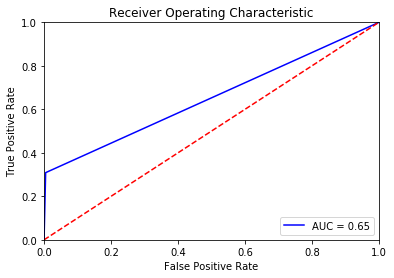

In [12]:
# Load model
with open('saved_models/model-{}-{}.pkl'.format(ALGORITHM, SUFFIX), 'rb') as f:
    model = pickle.load(f)

show_metrics_on_all_datasets(model, SUFFIX, ALGORITHM, with_all=False)

## Save model

In [11]:
save_model(model, 'model-{}-{}.pkl'.format(ALGORITHM, SUFFIX))

## Grid Search

In [14]:
%%time

# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

param_grid = {"n_estimators": [60, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# create and fit a ridge regression model, testing each alpha
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metrics.make_scorer(metrics.f1_score))
grid.fit(X_train, Y_train.is_in_scope)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 100, 200], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)
0.446063797568
{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 200}
CPU times: user 13min 24s, sys: 1min 15s, total: 14min 40s
Wall time: 15min 15s
